In [13]:
# 加载模型进行预测,使用优化后的模型进行预测
import torch
import torch.nn as nn
import torchvision 
from baseModel import FruitCNN
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
batch_size=32

In [14]:
# 数据预处理
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
# 加载预测数据集
predict_dataset = datasets.ImageFolder(
    root='fruits/Test',  # 替换为你的预测数据集路径
    transform=transform,
)
predict_loader = DataLoader(predict_dataset, batch_size=batch_size, shuffle=True) 


In [15]:
# 加载保存的模型
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Predict Using",device)
# 加载模型
model = FruitCNN(num_classes=len(predict_dataset.classes)).to(device)
# 加载模型参数
checkpoint=torch.load(r"new_model/best_model_Loss_0.0452_Acc_99.09%.pth", map_location=device)
# 检查是否包含训练信息
if "epoch" in checkpoint:
    print("Training epoch:", checkpoint["epoch"])
if "val_loss" in checkpoint:
    print("Validation loss:", checkpoint["val_loss"])
if "val_acc" in checkpoint:
    print("Validation accuracy:", checkpoint["val_acc"])

model.load_state_dict(checkpoint["state_dict"]) 

model.eval()


Predict Using cuda
Training epoch: 19
Validation loss: 0.045244282844997416
Validation accuracy: 99.08762341325811


C:\Users\Spark\AppData\Local\Temp\ipykernel_13276\345632222.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint=torch.load(r"new_model/best_model_Loss_0.0452_Acc_

FruitCNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Dropout2d(p=0.2, inplace=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=8192, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropou

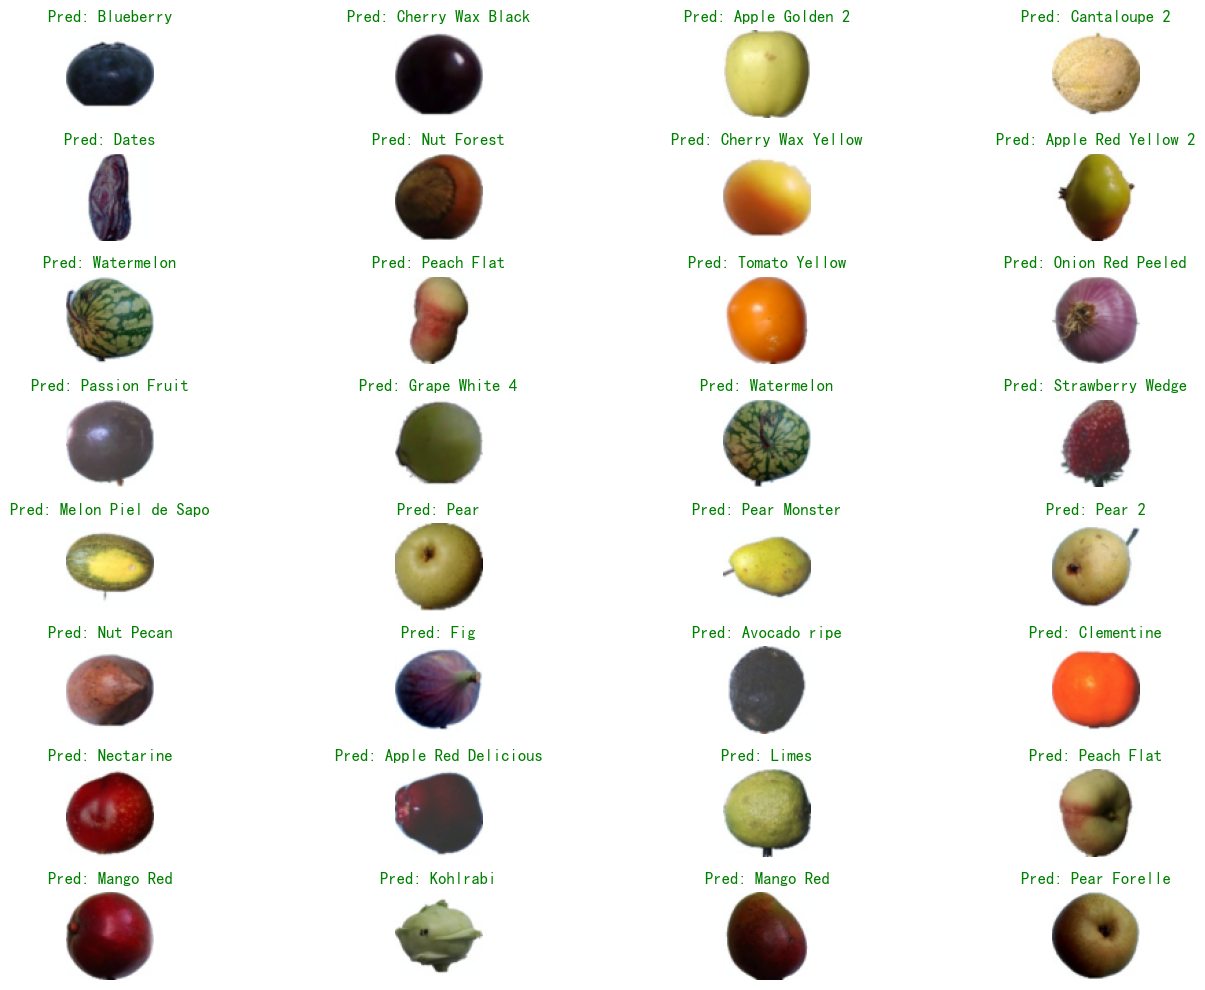

In [16]:
import matplotlib.pyplot as plt
import numpy as np
# 4. 预测和可视化函数
def visualize_predictions(test_loader, model, device, num_samples=32):
    # 获取一个批次的数据
    images, labels = next(iter(test_loader))
    images, labels = images.to(device), labels.to(device)
    
    # 进行预测
    with torch.no_grad():
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
    
    # 转换图像为可显示格式
    images = images.cpu().numpy()
    images = images.transpose(0, 2, 3, 1)  # 从 (B, C, H, W) 转为 (B, H, W, C)
    
    # 反归一化
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    images = std * images + mean  # 反归一化
    images = np.clip(images, 0, 1)  # 限制像素值在0-1之间
    
    # 创建可视化
    plt.figure(figsize=(15, 10))
    for i in range(min(num_samples, len(images))):
        ax = plt.subplot(8, 4, i+1)
        plt.imshow(images[i])
        true_label = predict_dataset.classes[labels[i].item()]
        pred_label = predict_dataset.classes[preds[i].item()]
        color = "green" if true_label == pred_label else "red"
        plt.title(f"Pred: {pred_label}", color=color)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# 5. 执行可视化
visualize_predictions(predict_loader, model, device)